# **Trabajo Final de Herramientas Computacionales**

**Nombre:** Santiago Andrés Montes Camacho

**Código:** 2210718

**Grupo:** PA2

En este notebook, se van a analizar la información del la potencia global activa, potencia global reactiva, intensidad global y voltaje, de una casa situada en Sceaux, entre enero y noviembre del 2010. Asimismo, se estudiará la información en base a minutos, días y años, con el fin de conocer qué tanto varía el entendimiento de sus relaciones dependiendo el tiempo con el cual se trabaje. También se llevará a cabo una regresión lineal que permita entender el comportamiento de esta información a partir de una función dada, teniendo en cuenta su margen de error y fiabilidad. 
Las relaciones a estudiar serán las siguientes:
1. Potencia global activa = A1(Intensidad Global) + B1
2. Potencia global activa = A2(Voltaje) + B2
3. Potencia global activa = A3.1(Intensidad Global) + A3.2(Voltaje) + B3

Cabe resaltar que los coeficientes denotados con la letra B, es decir, aquellos que no están asociados con una variable (B1 y B2), son los cortes en el eje vertical de la variable dependiente, es decir, el eje vertical. De igual manera, es importante resaltar que cuando se trabajen las dos primeras relaciones, se va a referir a los coeficientes A1 y A2 como las pendientes de la recta, pero cuando se trabajen con la tercera relación se usará directamente el nombre de coeficiente A3.1 y/o A3.2. 

De igual manera, se calculará el error de cada regresión, a través de la diferencia entre el valor propio de la información, y aquel correspondiente al de la regresión.

Finalmente, se redactarán algunas conclusiones al respecto.

In [1]:
#Importamos las librerías que se van a utilizar 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy.optimize import curve_fit

In [2]:
#A continuación se leen los archivos con los que se va a trabajar
data_1=pd.read_csv("D:/SANTIAGO/UIS/Trabajo final de computación/Global_active_power.csv")
data_2=pd.read_csv("D:/SANTIAGO/UIS/Trabajo final de computación/Global_intensity.csv")
data_3=pd.read_csv("D:/SANTIAGO/UIS/Trabajo final de computación/Global_reactive_power.csv")
data_4=pd.read_csv("D:/SANTIAGO/UIS/Trabajo final de computación/Voltage.csv")

In [3]:
#Se reunen todos los datos en un solo data frame para facilitar su lectura y relacionarlos más facilmente
result_1=pd.merge(data_2,data_4,on=["Datetime"])
result_2=pd.merge(data_1,data_3,on=['Datetime'])
result=pd.merge(result_1,result_2,on=["Datetime"])

In [4]:
result['Global_active_power(1000/60)']=round(result['Global_active_power']*1000/60)
result['Global_reactive_power(1000/60)']=round(result['Global_reactive_power']*1000/60)
result=result.set_index('Datetime')

In [5]:
#se muestran los datos concatenados que se van a usar más adelante
data=result.drop(['Global_active_power','Global_reactive_power'] ,axis=1)

## Información de las variables a utilizar

### Frecuencia en minutos

In [6]:
data

,Global_intensity,Voltage,Global_active_power(1000/60),Global_reactive_power(1000/60)
Datetime,,,,
2010-01-01 00:00:00,7.4,240.65,30.0,4.0
2010-01-01 00:01:00,7.4,240.07,30.0,4.0
2010-01-01 00:02:00,7.4,240.15,30.0,4.0
2010-01-01 00:03:00,7.2,240.26,29.0,3.0
2010-01-01 00:04:00,7.0,240.12,28.0,2.0
...,...,...,...,...
2010-11-26 20:58:00,4.0,240.43,16.0,0.0
2010-11-26 20:59:00,4.0,240.00,16.0,0.0
2010-11-26 21:00:00,3.8,239.82,16.0,0.0


In [7]:
data.index = pd.to_datetime(data.index)

### Frecuencia en días 

In [8]:
data.resample('D').mean()

,Global_intensity,Voltage,Global_active_power(1000/60),Global_reactive_power(1000/60)
Datetime,,,,
2010-01-01,3.537083,242.565722,14.131250,1.886111
2010-01-02,4.857778,243.631743,19.618750,1.438194
2010-01-03,3.757778,241.822778,15.011806,1.550000
2010-01-04,4.879028,241.754160,19.540972,1.681250
2010-01-05,3.929861,240.647167,15.288194,2.203472
...,...,...,...,...
2010-12-07,3.397222,240.218646,12.847222,3.322222
2010-12-08,1.623750,240.794931,6.208333,1.997917
2010-12-09,4.755694,241.619722,18.656250,2.316667


In [9]:
#Se hacen los resamples para días y meses
data_D=data.resample('D').mean()
data_D=data_D.dropna()
data_D

,Global_intensity,Voltage,Global_active_power(1000/60),Global_reactive_power(1000/60)
Datetime,,,,
2010-01-01,3.537083,242.565722,14.131250,1.886111
2010-01-02,4.857778,243.631743,19.618750,1.438194
2010-01-03,3.757778,241.822778,15.011806,1.550000
2010-01-04,4.879028,241.754160,19.540972,1.681250
2010-01-05,3.929861,240.647167,15.288194,2.203472
...,...,...,...,...
2010-12-07,3.397222,240.218646,12.847222,3.322222
2010-12-08,1.623750,240.794931,6.208333,1.997917
2010-12-09,4.755694,241.619722,18.656250,2.316667


### Frecuencia en meses 

In [10]:
data_M=data.resample('M').mean()
data_M

,Global_intensity,Voltage,Global_active_power(1000/60),Global_reactive_power(1000/60)
Datetime,,,,
2010-01-31,5.430332,242.338522,21.675111,2.091686
2010-02-28,4.836624,242.002101,19.281617,1.831168
2010-03-31,4.920399,241.475284,19.501882,2.283050
2010-04-30,4.363496,241.442527,17.270067,2.164943
2010-05-31,4.551504,241.296151,17.934049,2.127642
2010-06-30,4.170282,240.888985,16.256112,2.438660
2010-07-31,3.337202,240.965167,13.001181,2.325262
2010-08-31,3.954423,241.422944,15.500806,2.201590
2010-09-30,4.223837,241.267517,16.618377,2.115489


## Regresiones lineales de la información

En cuanto a los modelos, se van a usar dos posibles funciones, una relaciona dos variables y la otra relaciona a tres de ellas.

In [11]:
#Los datos que se relacionan linealmente son: Global active power con global intensity
def f1(x,a,b): #Lineal
    return a*x+b

def f2(X, a, b, c): #Lineal para 3 variables
    x,y = X
    return a*x + b*y + c

* La siguiente función tiene como objetivo automatizar el proceso de hacer la regresión lineal de las dos primeras relaciones, es decir, aquellas que trabajan con dos variables.

In [12]:
def get_fit_1(func,xdata,ydata,labelx,labely,r, color1, color2, title):
    
    popt1, pcov1 = curve_fit(func, xdata, ydata) #Se ajustan los valores de pendiente y corte según la función elegida
    popt1, pcov1 = np.around(popt1,r), np.around(np.sqrt(np.diag(pcov1)),r) #Se aproxima los valores para tener menos decimales, también se calcula la raíz de la covarianza para tener la desviación de la medición
    
    x=np.linspace(xdata.min(),xdata.max(),100)
       
    error_a=pcov1[0] #Margen de error del valor de la pendiente
    error_b=pcov1[1] #Margen de rror del valor del corte en el eje vertical
    
    E=np.sqrt(np.mean((ydata-func(xdata, *popt1))**2)) #Se calcula el error de la regresión

    plt.figure(figsize=(8,6))
    plt.plot(x, func(x, *popt1), color=color1, label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    plt.scatter(xdata,ydata,color=color2, label="Original data")
    
    plt.title(title) #En este caso el título asigna la frecuencia de tiempo con que se trabaja
    
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    
    print("El valor de la pendiente es igual a: ", popt1[0] , "±", error_a)
    print("El valor del corte en el eje vertical es de: ", popt1[1] , "±", error_b)
    
    print("\nEl error de la regresión es de: {} ".format(round(E, r)))
    

* La siguiente función va a automatizar la regresión lineal de la tercera relación, es decir, aquella que trabaja con tres variables, dos independientes y una dependiente:

In [13]:
def get_fit_2(func,xdata,ydata,zdata,labelx,labely,labelz,r,color1,color2,title): 
    
    popt1, pcov1 = curve_fit(func, (xdata, ydata), zdata) #Se ajustan los valores de A3.1,A3.2 y el corte en z según la función elegida
    popt1, pcov1 = np.around(popt1,r), np.around(np.sqrt(np.diag(pcov1)),r) #Se aproximan los valores para tener menos decimales
    
    
    E=np.sqrt(np.mean((zdata-func((xdata,ydata), *popt1))**2)) #Se calcula el error de la regresión

    
    error_a=pcov1[0] #Margen de error de A3.1
    error_b=pcov1[1] #Margen de error de A3.2
    error_c=pcov1[2] #Margen de error del corte en el eje z
    
    fig=plt.figure(figsize=(8,6))
    x=np.linspace(xdata.min(),xdata.max(),100)
    y=np.linspace(ydata.min(),ydata.max(),100)
    ax=fig.add_subplot(111,projection='3d')
    ax.plot3D(x,y,f2((x,y),*popt1), color=color1,label=r'fit: {}$\pm${}'.format(np.around(tuple(popt1),r),tuple(pcov1)))
    ax.scatter(xdata,ydata,zdata, color=color2, label="Original data")
    ax.set_xlabel(labelx) #Nombre del eje x
    ax.set_ylabel(labely) #Nombre del eje y
    ax.set_zlabel(labelz) #Nombre del eje z
    ax.set_title(title) #En este caso el título asigna la frecuencia de tiempo con que se trabaja
    
    ax.legend()
    
    print("El valor de la A3.1 es igual a: ", popt1[0] , "±", error_a)
    print("El valor de la A3.2 es igual a: ", popt1[1] , "±", error_a)
    print("El valor del corte en el eje vertical es de: ", popt1[2] , "±", error_b)
    
    print("\nEl error de la regresión es de: {} ".format(round(E, r)))

### Primera relación 

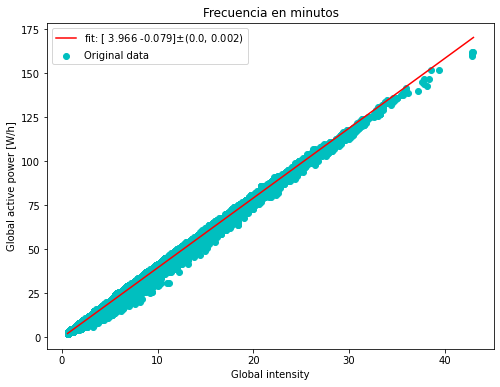

El valor de la pendiente es igual a:  3.966 ± 0.0
El valor del corte en el eje vertical es de:  -0.079 ± 0.002

El error de la regresión es de: 0.871 


In [14]:
get_fit_1(f1,data["Global_intensity"],data["Global_active_power(1000/60)"],"Global intensity","Global active power [W/h]",3,'red','c','Frecuencia en minutos')

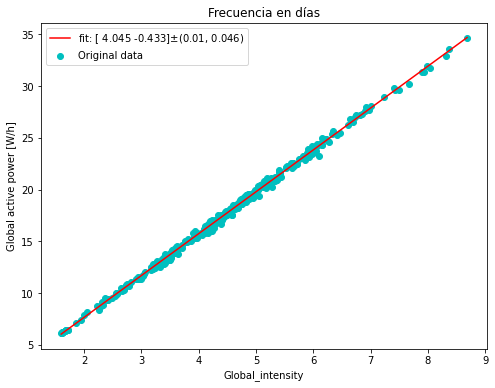

El valor de la pendiente es igual a:  4.045 ± 0.01
El valor del corte en el eje vertical es de:  -0.433 ± 0.046

El error de la regresión es de: 0.25 


In [15]:
get_fit_1(f1,data_D["Global_intensity"],data_D["Global_active_power(1000/60)"],"Global_intensity","Global active power [W/h]",3, 'red','c','Frecuencia en días')

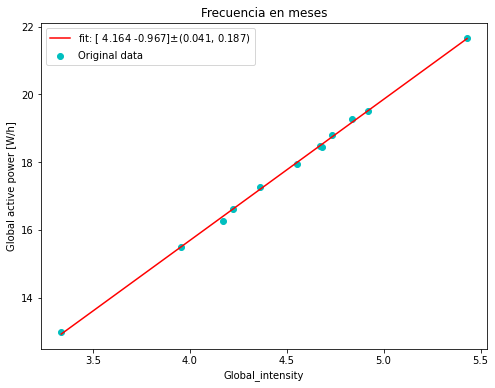

El valor de la pendiente es igual a:  4.164 ± 0.041
El valor del corte en el eje vertical es de:  -0.967 ± 0.187

El error de la regresión es de: 0.067 


In [16]:
get_fit_1(f1,data_M["Global_intensity"],data_M["Global_active_power(1000/60)"],"Global_intensity","Global active power [W/h]",3,'red','c','Frecuencia en meses')

### Segunda Relación

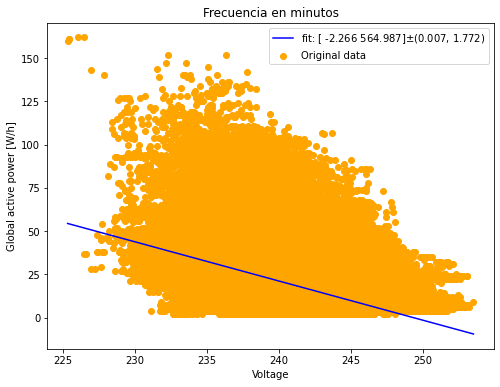

El valor de la pendiente es igual a:  -2.266 ± 0.007
El valor del corte en el eje vertical es de:  564.987 ± 1.772

El error de la regresión es de: 14.144 


In [17]:
get_fit_1(f1,data["Voltage"],data["Global_active_power(1000/60)"],"Voltage", "Global active power [W/h]",3,'blue','orange', 'Frecuencia en minutos')

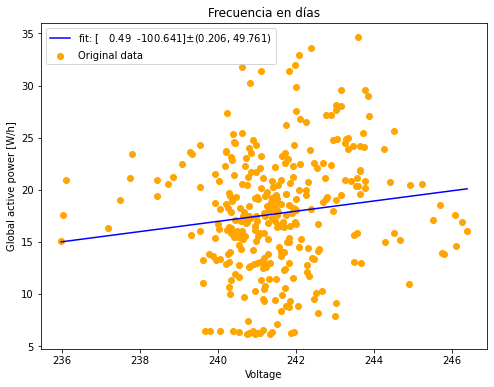

El valor de la pendiente es igual a:  0.49 ± 0.206
El valor del corte en el eje vertical es de:  -100.641 ± 49.761

El error de la regresión es de: 5.681 


In [18]:
get_fit_1(f1,data_D["Voltage"],data_D["Global_active_power(1000/60)"],"Voltage","Global active power [W/h]",3,'blue','orange','Frecuencia en días')

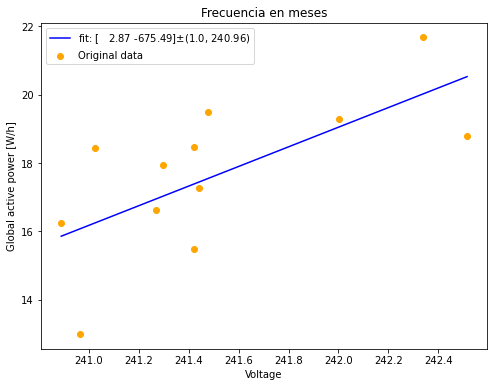

El valor de la pendiente es igual a:  2.87 ± 1.0
El valor del corte en el eje vertical es de:  -675.49 ± 240.96

El error de la regresión es de: 1.58 


In [19]:
get_fit_1(f1,data_M["Voltage"],data_M["Global_active_power(1000/60)"],"Voltage", "Global active power [W/h]",2,'blue','orange','Frecuencia en meses')

### Tercera relación

El valor de la A3.1 es igual a:  3.99 ± 0.0
El valor de la A3.2 es igual a:  0.075 ± 0.0
El valor del corte en el eje vertical es de:  -18.338 ± 0.0

El error de la regresión es de: 0.85 


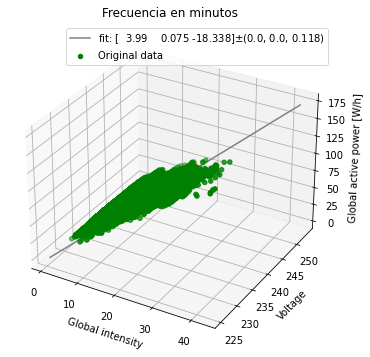

In [20]:
get_fit_2(f2,data["Global_intensity"],data["Voltage"], 
          data["Global_active_power(1000/60)"],"Global intensity","Voltage","Global active power [W/h]",3,'grey','green','Frecuencia en minutos')

El valor de la A3.1 es igual a:  4.034 ± 0.008
El valor de la A3.2 es igual a:  0.099 ± 0.008
El valor del corte en el eje vertical es de:  -24.296 ± 0.007

El error de la regresión es de: 0.198 


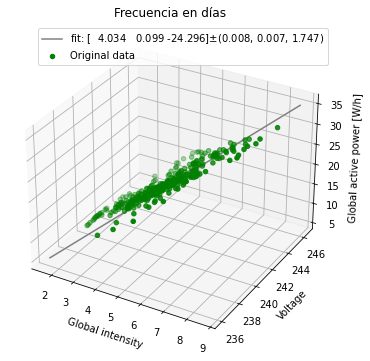

In [21]:
get_fit_2(f2,data_D["Global_intensity"],data_D["Voltage"], 
          data_D["Global_active_power(1000/60)"],"Global intensity","Voltage","Global active power [W/h]",3,'grey','green', 'Frecuencia en días')

El valor de la A3.1 es igual a:  4.082 ± 0.04
El valor de la A3.2 es igual a:  0.129 ± 0.04
El valor del corte en el eje vertical es de:  -31.705 ± 0.041

El error de la regresión es de: 0.066 


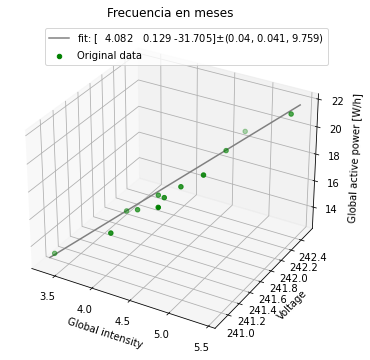

In [22]:
get_fit_2(f2,data_M["Global_intensity"],data_M["Voltage"], 
          data_M["Global_active_power(1000/60)"],"Global intensity","Voltage","Global active power [W/h]",3,'grey','green','Frecuencia en meses')

## Conclusiones Finales

* Tanto en la primera, segunda y tercera relación, el error de la regresión es menor cuando se trabaja con la información en función de los meses. Esto se debe a que la cantidad de datos es muchísimo menor, por lo que a su vez habrá una menor desviación con el total. De hecho, algo que confirma esto es que el mayor error se encuentra cuando la información se trabaja en minutos. 


* La segunda relación presenta errores de regresión mayores, por lo que sus datos se encuentran menos correlacionados que los demás. 


* La tercera relación es aquella que presenta un menor error en su regresión, por lo que puede afirmarse que es aquella en cuyos datos hay una mayor correlación, siendo por ende viable entenderla a partir de la regresión calculada.